In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
Simulation_Dataset_T18= {
    "2018": "../../../data/simulated_data_7years/T18/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/T18/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/T18/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/T18/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/T18/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/T18/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/T18/2024/Simulation_Outputs"   
}

Weather_Dataset_T18= {
    "2018": "../../../data/simulated_data_7years/T18/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/T18/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/T18/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/T18/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/T18/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/T18/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/T18/2024/Weather_Dataset.txt"   
}

Simulation_Dataset_T20= {
    "2018": "../../../data/simulated_data_7years/T20/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/T20/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/T20/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/T20/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/T20/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/T20/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/T20/2024/Simulation_Outputs"   
}

Weather_Dataset_T20= {
    "2018": "../../../data/simulated_data_7years/T20/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/T20/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/T20/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/T20/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/T20/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/T20/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/T20/2024/Weather_Dataset.txt"   
}


In [3]:
consommation_chauffage_T18 = extract_and_concat_consommation(Simulation_Dataset_T18, column_index=4, prefix="consommation_heat_T18")
consommation_chauffage_T20 = extract_and_concat_consommation(Simulation_Dataset_T20, column_index=4, prefix="consommation_heat_T20")

city_groups = {
    "Weather_Dataset": Weather_Dataset_T18  
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "ray_": 7,
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)
Text_combined_T18 = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined_T18 = combined_data.get('Hum_combined_Weather_Dataset')
ray_combined_T18 = combined_data.get('ray_combined_Weather_Dataset')   
occupation=pd.read_csv("../../../data/simulated_data_7years/T18/Occupancy_per_hour",delimiter='\t')
occ_df_T18 = pd.DataFrame(occupation["RealOCCUP                "].values[:8760].reshape(-1, 24))
occupation_7years_T18 = pd.concat([occ_df_T18] * 7, ignore_index=True)


city_groups = {
    "Weather_Dataset": Weather_Dataset_T20  
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "ray_": 7,
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)
Text_combined_T20  = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined_T20  = combined_data.get('Hum_combined_Weather_Dataset')
ray_combined_T20  = combined_data.get('ray_combined_Weather_Dataset')   
occupation=pd.read_csv("../../../data/simulated_data_7years/T20/Occupancy_per_hour",delimiter='\t')
occ_df_T20  = pd.DataFrame(occupation["RealOCCUP                "].values[:8760].reshape(-1, 24))
occupation_7years_T20  = pd.concat([occ_df_T20 ] * 7, ignore_index=True)

In [4]:
Text_Occ_Hum_Ray_heat_profil_T18=pd.read_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_Humidite_Ray_T18_data_from_1_novembre_to_31_avril.csv")
Text_Occ_Hum_Ray_heat_profil_T20=pd.read_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_Humidite_Ray_T20_data_from_1_novembre_to_31_avril.csv")

In [5]:
Text_Occ_Hum_Ray_heat_profil_T18

,Date,0,1,2,3,4,5,6,7,8,...,17.3,18.3,19.3,20.3,21.3,22.3,23.3,heat_on,clusters_1,cluster_reel
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,3.662093,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65..."
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,1.827115,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65..."
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,3.661866,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65..."
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,5.503813,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65..."
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,1.827181,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,755.219054,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1165.4066272645118, 1328.69492101425, 1478.09..."
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,805.246153,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1165.4066272645118, 1328.69492101425, 1478.09..."
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,817.474865,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1165.4066272645118, 1328.69492101425, 1478.09..."
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,544.143012,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,"[1165.4066272645118, 1328.69492101425, 1478.09..."


In [6]:
start_date = "2018-01-01"

# Pour T18
dates_T18 = pd.date_range(start=start_date, periods=len(consommation_chauffage_T18), freq="D")
consommation_chauffage_T18.insert(0, "Date", dates_T18)
add_heating_season(consommation_chauffage_T18)
df_conso_T18 = consommation_chauffage_T18[consommation_chauffage_T18["heat"] == 1].copy().reset_index(drop=True)

# Pour T20
dates_T20 = pd.date_range(start=start_date, periods=len(consommation_chauffage_T20), freq="D")
consommation_chauffage_T20.insert(0, "Date", dates_T20)
add_heating_season(consommation_chauffage_T20)
df_conso_T20 = consommation_chauffage_T20[consommation_chauffage_T20["heat"] == 1].copy().reset_index(drop=True)


In [7]:
df_T18=pd.concat([Text_Occ_Hum_Ray_heat_profil_T18.iloc[:, :],df_conso_T18.iloc[:, 1:-1]],axis=1).reset_index(drop=True)
df_T20=pd.concat([Text_Occ_Hum_Ray_heat_profil_T20.iloc[:, :],df_conso_T20.iloc[:, 1:-1]],axis=1).reset_index(drop=True)


In [8]:
pd.set_option('display.max_columns', None)
df_T18

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2,21.2,22.2,23.2,0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3,12.3,13.3,14.3,15.3,16.3,17.3,18.3,19.3,20.3,21.3,22.3,23.3,heat_on,clusters_1,cluster_reel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,10.415,12.350,13.595,14.290,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,73.5,64.5,54.5,46.5,41.0,42.5,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.351359,1121.707363,2209.337714,2380.022684,1457.456657,1171.393639,449.581011,200.764985,79.889476,3.662093,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65...",0.000000,0.000000,0.000000,0.000000,0.000000,26.624590,15.479325,320.234710,574.066931,8.140834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,9.500,10.340,11.485,12.410,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,89.5,89.0,87.0,83.5,82.0,84.0,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.502910,35.257821,134.866672,114.431209,107.153671,128.047996,264.277133,63.422252,26.470841,1.827115,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65...",0.000000,0.000000,26.355486,135.931463,284.428147,410.071790,634.577810,793.961286,923.628906,950.486164,902.644715,631.496249,598.363786,424.551572,270.034004,279.861203,299.999506,373.283830,454.864248,478.223473,489.507994,526.505874,564.557303,582.280346
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,15.450,15.780,16.045,16.045,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,91.0,90.0,88.0,84.5,80.5,78.0,76.0,76.0,78.0,79.0,80.0,78.5,74.5,73.0,72.0,69.5,69.0,71.0,73.5,75.0,75.5,75.5,80.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26.498384,437.960569,961.085031,1249.958855,1050.325035,383.859252,623.991615,342.485410,3.661866,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65...",608.144580,640.254841,643.128269,590.154029,512.874160,459.310443,379.888118,312.372347,293.526697,295.064181,64.519723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.185553
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,15.670,16.095,16.830,17.575,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,85.0,84.5,84.5,85.0,84.5,83.5,82.5,81.5,80.5,79.0,78.0,75.5,71.0,66.5,62.5,61.0,60.5,63.0,69.5,74.5,74.5,70.5,73.0,77.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.827226,414.624752,1201.474376,2038.456014,2613.275421,2648.319534,2509.650465,1901.783552,1193.462926,5.503813,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[85.65604419633104, 128.26075438515656, 183.65...",0.000000,0.000000,0.000000,0.000000,14.491040,30.558416,7.416093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,11.990,14.050,15.505,16.080,15.950,15.425,

In [10]:
def concat_j_and_j_minus_1(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)

    combined_rows = []

    for idx, row in df.iterrows():
        jour = row['Date']
        jour_precedent = jour - pd.Timedelta(days=1)

        prev_row = df[df['Date'] == jour_precedent]

        if not prev_row.empty:
            prev_row = prev_row.iloc[0]
            prev_row_renamed = prev_row.add_suffix('_j-1')

            combined_row = pd.concat([
                prev_row_renamed.to_frame().T.reset_index(drop=True), 
                row.to_frame().T.reset_index(drop=True)
            ], axis=1)

            combined_rows.append(combined_row)
        else:
            continue

    df_final = pd.concat(combined_rows, ignore_index=True)

    # Correction ici : vérifier que col est une string avant 'Date' in col
    cols_to_drop = [col for col in df_final.columns if isinstance(col, str) and 'Date' in col]
    df_final = df_final.drop(columns=cols_to_drop)

    return df_final.reset_index(drop=True)

df_T18_final = concat_j_and_j_minus_1(df_T18)
df_T20_final = concat_j_and_j_minus_1(df_T20)


In [12]:
df_T18_final.columns = make_column_names_unique(df_T18_final.columns)
df_T20_final.columns = make_column_names_unique(df_T20_final.columns)


In [13]:
df_T20_final.head(1)

,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,0.1_j-1,1.1_j-1,2.1_j-1,3.1_j-1,4.1_j-1,5.1_j-1,6.1_j-1,7.1_j-1,8.1_j-1,9.1_j-1,10.1_j-1,11.1_j-1,12.1_j-1,13.1_j-1,14.1_j-1,15.1_j-1,16.1_j-1,17.1_j-1,18.1_j-1,19.1_j-1,20.1_j-1,21.1_j-1,22.1_j-1,23.1_j-1,0.2_j-1,1.2_j-1,2.2_j-1,3.2_j-1,4.2_j-1,5.2_j-1,6.2_j-1,7.2_j-1,8.2_j-1,9.2_j-1,10.2_j-1,11.2_j-1,12.2_j-1,13.2_j-1,14.2_j-1,15.2_j-1,16.2_j-1,17.2_j-1,18.2_j-1,19.2_j-1,20.2_j-1,21.2_j-1,22.2_j-1,23.2_j-1,0.3_j-1,1.3_j-1,2.3_j-1,3.3_j-1,4.3_j-1,5.3_j-1,6.3_j-1,7.3_j-1,8.3_j-1,9.3_j-1,10.3_j-1,11.3_j-1,12.3_j-1,13.3_j-1,14.3_j-1,15.3_j-1,16.3_j-1,17.3_j-1,18.3_j-1,19.3_j-1,20.3_j-1,21.3_j-1,22.3_j-1,23.3_j-1,heat_on_j-1,clusters_1_j-1,cluster_reel_j-1,0_j-1_2,1_j-1_2,2_j-1_2,3_j-1_2,4_j-1_2,5_j-1_2,6_j-1_2,7_j-1_2,8_j-1_2,9_j-1_2,10_j-1_2,11_j-1_2,12_j-1_2,13_j-1_2,14_j-1_2,15_j-1_2,16_j-1_2,17_j-1_2,18_j-1_2,19_j-1_2,20_j-1_2,21_j-1_2,22_j-1_2,23_j-1_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2,21.2,22.2,23.2,0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3,12.3,13.3,14.3,15.3,16.3,17.3,18.3,19.3,20.3,21.3,22.3,23.3,heat_on,clusters_1,cluster_reel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,73.5,64.5,54.5,46.5,41.0,42.5,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.351359,1121.707363,2209.337714,2380.022684,1457.456657,1171.393639,449.581011,200.764985,79.889476,3.662093,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879....",0.0,1459.76998,1592.514433,1713.740557,1820.189936,1900.5428,2149.713214,2389.025427,2587.906682,1910.168077,739.778411,0.0,0.0,0.0,0.0,0.0,109.537782,224.681536,364.13853,516.770173,666.660657,821.249843,956.41778,1073.261235,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,89.5,89.0,87.0,83.5,82.0,84.0,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.50291,35.257821,134.866672,114.431209,107.153671,128.047996,264.277133,63.422252,26.470841,1.827115,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879....",1199.773226,1333.646128,1449.005507,1543.755644,1627.123242,1693.133503,1911.25062,2067.169079,2196.62349,2178.598551,2088.8352,1683.973776,1714.396914,1509.560123,1325.26116,1309.197012,1255.154035,1256.686716,1268.128986,1270.321652,1261.233678,1279.851884,1300.98806,1302.227487


In [12]:
cols = df_final.columns.tolist()
cols[98]  

'cluster_reel_j-1'

In [14]:
import ast
import numpy as np

cols_T18 = df_T18_final.columns.tolist()

text_j_1_T18 = cols_T18[:24] 
hum_j_1_T18 = cols_T18[24:48]   
occ_j_1_T18 = cols_T18[48:72]   
ray_j_1_T18 = cols_T18[72:96]       
cluster_reel_j_1_T18 = cols_T18[98]          
conso_part_T18 = cols_T18[99:123]         
text_j_T18 = cols_T18[123:147] 
hum_j_T18 = cols_T18[147:171]   
occ_j_T18 = cols_T18[171:195]   
ray_j_T18 = cols_T18[195:219]       
cluster_reel_j_T18 = cols_T18[221]         

all_vectors_T18 = []

for i, row in df_T18_final.iterrows():
    vectors_line = np.zeros((24, 11))
    real_centroid_j_1 = ast.literal_eval(row[cluster_reel_j_1_T18])
    real_centroid_j = ast.literal_eval(row[cluster_reel_j_T18])
    
    for h in range(24):
        vectors_line[h, 0] = row[text_j_1_T18[h]]
        vectors_line[h, 1] = row[hum_j_1_T18[h]]
        vectors_line[h, 2] = row[occ_j_1_T18[h]]
        vectors_line[h, 3] = row[ray_j_1_T18[h]]
        vectors_line[h, 4] = real_centroid_j_1[h]
        vectors_line[h, 5] = row[conso_part_T18[h]]
        vectors_line[h, 6] = row[text_j_T18[h]]
        vectors_line[h, 7] = row[hum_j_T18[h]]
        vectors_line[h, 8] = row[occ_j_T18[h]]
        vectors_line[h, 9] = row[ray_j_T18[h]]
        vectors_line[h, 10] = real_centroid_j[h]    

    all_vectors_T18.append(vectors_line)

X_T18 = np.stack(all_vectors_T18)
label_cols_T18 = df_T18_final.columns[-24:]
y_T18 = df_T18_final[label_cols_T18].values

print("Shape X_T18:", X_T18.shape)
print("Shape y_T18:", y_T18.shape)


# ---------------------- même chose pour df_T20_final ----------------------

cols_T20 = df_T20_final.columns.tolist()

text_j_1_T20 = cols_T20[:24] 
hum_j_1_T20 = cols_T20[24:48]   
occ_j_1_T20 = cols_T20[48:72]   
ray_j_1_T20 = cols_T20[72:96]       
cluster_reel_j_1_T20 = cols_T20[98]          
conso_part_T20 = cols_T20[99:123]         
text_j_T20 = cols_T20[123:147] 
hum_j_T20 = cols_T20[147:171]   
occ_j_T20 = cols_T20[171:195]   
ray_j_T20 = cols_T20[195:219]       
cluster_reel_j_T20 = cols_T20[221]         

all_vectors_T20 = []

for i, row in df_T20_final.iterrows():
    vectors_line = np.zeros((24, 11))
    real_centroid_j_1 = ast.literal_eval(row[cluster_reel_j_1_T20])
    real_centroid_j = ast.literal_eval(row[cluster_reel_j_T20])
    
    for h in range(24):
        vectors_line[h, 0] = row[text_j_1_T20[h]]
        vectors_line[h, 1] = row[hum_j_1_T20[h]]
        vectors_line[h, 2] = row[occ_j_1_T20[h]]
        vectors_line[h, 3] = row[ray_j_1_T20[h]]
        vectors_line[h, 4] = real_centroid_j_1[h]
        vectors_line[h, 5] = row[conso_part_T20[h]]
        vectors_line[h, 6] = row[text_j_T20[h]]
        vectors_line[h, 7] = row[hum_j_T20[h]]
        vectors_line[h, 8] = row[occ_j_T20[h]]
        vectors_line[h, 9] = row[ray_j_T20[h]]
        vectors_line[h, 10] = real_centroid_j[h]    

    all_vectors_T20.append(vectors_line)

X_T20 = np.stack(all_vectors_T20)
label_cols_T20 = df_T20_final.columns[-24:]
y_T20 = df_T20_final[label_cols_T20].values

print("Shape X_T20:", X_T20.shape)
print("Shape y_T20:", y_T20.shape)


Shape X_T18: (1259, 24, 11)
Shape y_T18: (1259, 24)
Shape X_T20: (1259, 24, 11)
Shape y_T20: (1259, 24)


In [15]:
# Pour T18
n_samples_T18, n_timesteps_T18, n_features_T18 = X_T18.shape
X_T18_2d = X_T18.reshape(-1, n_features_T18)  # (n_samples*24, n_features)
scaler_X_T18 = MinMaxScaler()
X_T18_2d_scaled = scaler_X_T18.fit_transform(X_T18_2d)
X_T18_scaled = X_T18_2d_scaled.reshape(n_samples_T18, n_timesteps_T18, n_features_T18)

scaler_y_T18 = MinMaxScaler()
y_T18_scaled = scaler_y_T18.fit_transform(y_T18)

print("X_T18_scaled shape:", X_T18_scaled.shape)
print("y_T18_scaled shape:", y_T18_scaled.shape)


# Pour T20
n_samples_T20, n_timesteps_T20, n_features_T20 = X_T20.shape
X_T20_2d = X_T20.reshape(-1, n_features_T20)
scaler_X_T20 = MinMaxScaler()
X_T20_2d_scaled = scaler_X_T20.fit_transform(X_T20_2d)
X_T20_scaled = X_T20_2d_scaled.reshape(n_samples_T20, n_timesteps_T20, n_features_T20)

scaler_y_T20 = MinMaxScaler()
y_T20_scaled = scaler_y_T20.fit_transform(y_T20)

print("X_T20_scaled shape:", X_T20_scaled.shape)
print("y_T20_scaled shape:", y_T20_scaled.shape)


X_T18_scaled shape: (1259, 24, 11)
y_T18_scaled shape: (1259, 24)
X_T20_scaled shape: (1259, 24, 11)
y_T20_scaled shape: (1259, 24)


In [16]:
# Pour T18
X_train2_T18, X_test2_T18, y_train2_T18, y_test2_T18 = train_test_split(
    X_T18_scaled, y_T18_scaled, test_size=0.2, shuffle=False
)

print("Shape de X_train2_T18 :", X_train2_T18.shape)
print("Shape de X_test2_T18 :", X_test2_T18.shape)
print("Shape de y_train2_T18 :", y_train2_T18.shape)
print("Shape de y_test2_T18 :", y_test2_T18.shape)


# Pour T20
X_train2_T20, X_test2_T20, y_train2_T20, y_test2_T20 = train_test_split(
    X_T20_scaled, y_T20_scaled, test_size=0.2, shuffle=False
)

print("Shape de X_train2_T20 :", X_train2_T20.shape)
print("Shape de X_test2_T20 :", X_test2_T20.shape)
print("Shape de y_train2_T20 :", y_train2_T20.shape)
print("Shape de y_test2_T20 :", y_test2_T20.shape)

Shape de X_train2_T18 : (1007, 24, 11)
Shape de X_test2_T18 : (252, 24, 11)
Shape de y_train2_T18 : (1007, 24)
Shape de y_test2_T18 : (252, 24)
Shape de X_train2_T20 : (1007, 24, 11)
Shape de X_test2_T20 : (252, 24, 11)
Shape de y_train2_T20 : (1007, 24)
Shape de y_test2_T20 : (252, 24)


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0714 - mae: 0.1901 - mse: 0.0714 - val_loss: 0.0431 - val_mae: 0.1488 - val_mse: 0.0431
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - mae: 0.1137 - mse: 0.0240 - val_loss: 0.0157 - val_mae: 0.0836 - val_mse: 0.0157
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0162 - mae: 0.0884 - mse: 0.0162 - val_loss: 0.0143 - val_mae: 0.0762 - val_mse: 0.0143
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mae: 0.0803 - mse: 0.0131 - val_loss: 0.0129 - val_mae: 0.0717 - val_mse: 0.0129
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mae: 0.0747 - mse: 0.0117 - val_loss: 0.0086 - val_mae: 0.0633 - val_mse: 0.0086
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mae: 0.0673 - mse: 0.0091 - val_loss: 0.0084 - val_mae: 0.0592 - val_mse: 0.0084
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mae: 0.0639 - mse: 0.0085 - val

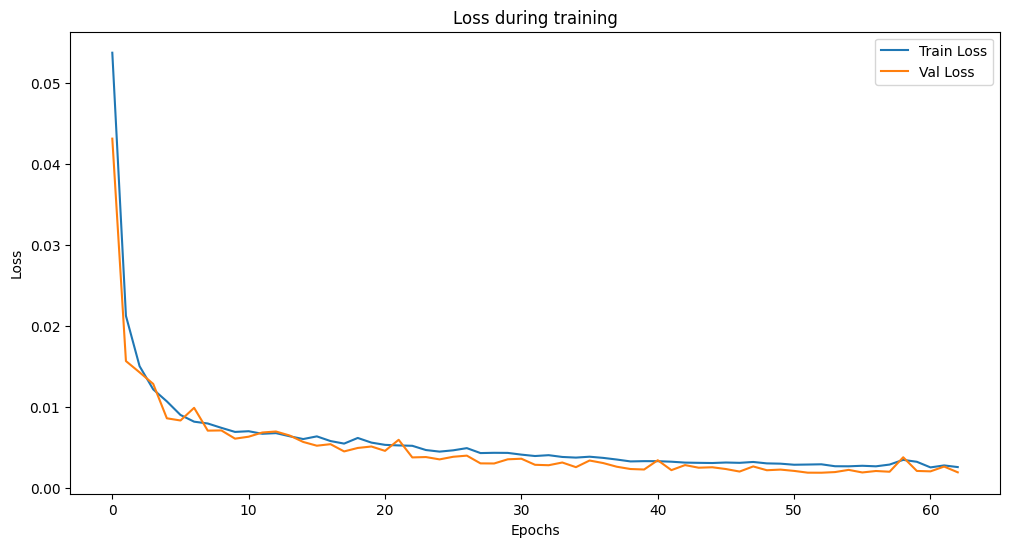

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - mae: 0.0325 - mse: 0.0023
Validation Loss : 0.0019288042094558477
Validation MAE: 0.028017882257699966
Validation MSE: 0.0019288042094558477
Validation RMSE: 0.04391815352967208
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test MAE: 134.58297927616556
Test MSE: 48036.08271780352
Test RMSE: 219.17135469263204
Test R²: 0.9247586886489501
Test CVRMSE: 0.4058156775963685
Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0770 - mae: 0.2012 - mse: 0.0770 - val_loss: 0.0305 - val_mae: 0.1281 - val_mse: 0.0305
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0254 - mae: 0.1177 - mse: 0.0254 - val_loss: 0.0149 - val_mae: 0.0904 - val_mse: 0.0149
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mae: 0.0961 - mse: 0.0169 - val_loss: 0.0119 - val_mae: 0.0774 - val_mse: 0.0119
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mae: 0.0856 - mse: 0.0135 - val_loss: 0.0103 - val_mae: 0.0734 - val_mse: 0.0103
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mae: 0.0802 - mse: 0.0118 - val_loss: 0.0094 - val_mae: 0.0706 - val_mse: 0.0094
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mae: 0.0739 - mse: 0.0100 - val_loss: 0.0085 - val_mae: 0.0675 - val_mse: 0.0085
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mae: 0.0752 - mse: 0.0102 - val_loss: 0.007

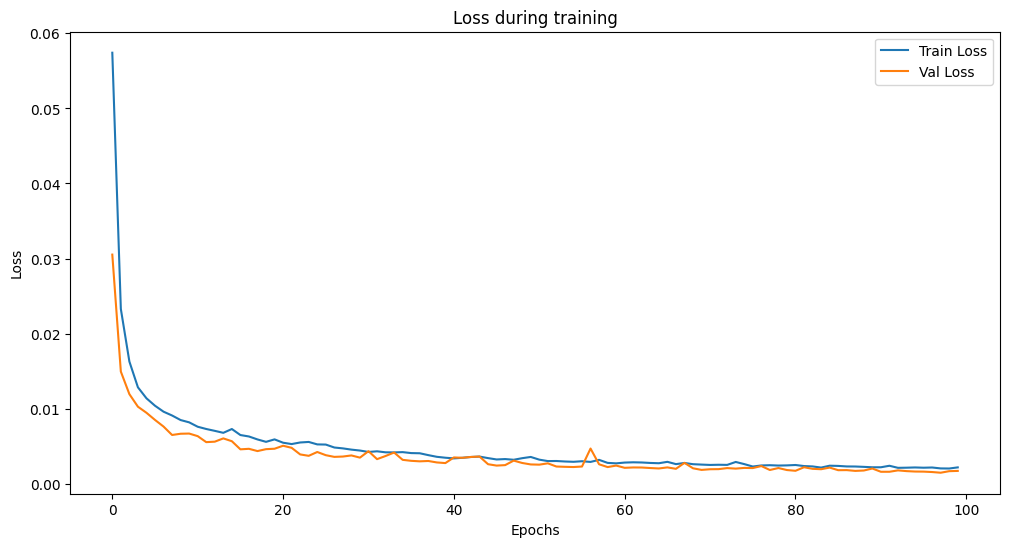

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0016
Validation Loss : 0.001455268356949091
Validation MAE: 0.026183951646089554
Validation MSE: 0.001455268356949091
Validation RMSE: 0.03814797972303502
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test MAE: 139.88772496881256
Test MSE: 44491.87193896394
Test RMSE: 210.9309648651993
Test R²: 0.953757092054956
Test CVRMSE: 0.23749948428629017


In [18]:
# Pour T18
model2_T18, history2_T18, loss2_T18, mae2_T18, mse2_T18, rmse2_T18, mae_test2_T18, mse_test2_T18, rmse_test2_T18, r2_T18, cvrmse_T18, predictions2_T18 = model_lstm(
    X_train2_T18, 
    y_train2_T18, 
    X_test2_T18, 
    y_test2_T18, 
    scaler_X_T18, 
    scaler_y_T18
)

# Pour T20
model2_T20, history2_T20, loss2_T20, mae2_T20, mse2_T20, rmse2_T20, mae_test2_T20, mse_test2_T20, rmse_test2_T20, r2_T20, cvrmse_T20, predictions2_T20 = model_lstm(
    X_train2_T20, 
    y_train2_T20, 
    X_test2_T20, 
    y_test2_T20, 
    scaler_X_T20, 
    scaler_y_T20
)


### Entraînement du modèle sur l’ensemble des données T20 et évaluation des performances sur l’ensemble des données T18

X_T20_scaled shape: (1259, 24, 11)
y_T20_scaled shape: (1259, 24)
X_T18_scaled shape: (1259, 24, 11)
y_T18_scaled shape: (1259, 24)
Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0693 - mae: 0.1957 - mse: 0.0693 - val_loss: 0.0170 - val_mae: 0.0961 - val_mse: 0.0170
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0220 - mae: 0.1104 - mse: 0.0220 - val_loss: 0.0129 - val_mae: 0.0853 - val_mse: 0.0129
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mae: 0.0998 - mse: 0.0179 - val_loss: 0.0102 - val_mae: 0.0757 - val_mse: 0.0102
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mae: 0.0874 - mse: 0.0139 - val_loss: 0.0070 - val_mae: 0.0612 - val_mse: 0.0070
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0108 - mae: 0.0771 - mse: 0.0108 - val_loss: 0.0060 - val_mae: 0.0563 - val_mse: 0.0060
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0106 - mae: 0.0757 - mse: 0.0106 - val_loss: 0.0061 - val_mae: 0.0572 - val_mse: 0.0061
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mae: 0.0735 - mse: 0.0097 - val_loss: 0.005

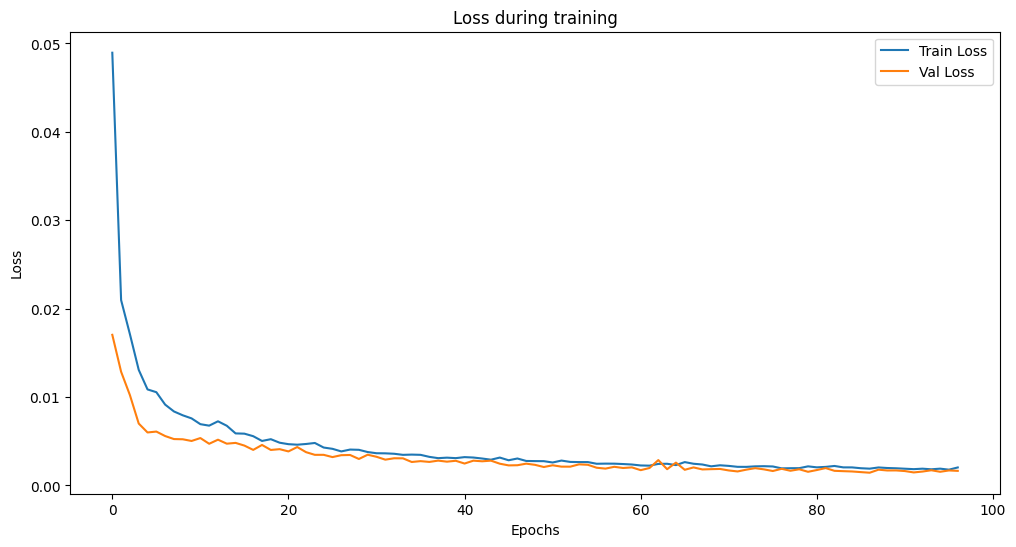

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - mae: 0.0233 - mse: 0.0013
Validation Loss : 0.0014381473883986473
Validation MAE: 0.02481776662170887
Validation MSE: 0.0014381473883986473
Validation RMSE: 0.03792291376461792
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test MAE: 153.71256457664086
Test MSE: 56367.49867674847
Test RMSE: 237.41840425027812
Test R²: 0.9207163957386338
Test CVRMSE: 0.40939483302845137


In [20]:
# Fit les scalers sur T20 (train)
n_samples_T20, n_timesteps, n_features = X_T20.shape
X_T20_2d = X_T20.reshape(-1, n_features)
scaler_X = MinMaxScaler()
X_T20_2d_scaled = scaler_X.fit_transform(X_T20_2d)
X_T20_scaled = X_T20_2d_scaled.reshape(n_samples_T20, n_timesteps, n_features)

scaler_y = MinMaxScaler()
y_T20_scaled = scaler_y.fit_transform(y_T20)

# Transforme T18 (test) avec les scalers du train
n_samples_T18 = X_T18.shape[0]
X_T18_2d = X_T18.reshape(-1, n_features)
X_T18_2d_scaled = scaler_X.transform(X_T18_2d)
X_T18_scaled = X_T18_2d_scaled.reshape(n_samples_T18, n_timesteps, n_features)

y_T18_scaled = scaler_y.transform(y_T18)

# Vérification
print("X_T20_scaled shape:", X_T20_scaled.shape)
print("y_T20_scaled shape:", y_T20_scaled.shape)
print("X_T18_scaled shape:", X_T18_scaled.shape)
print("y_T18_scaled shape:", y_T18_scaled.shape)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_T20_scaled,
    y_T20_scaled,
    X_T18_scaled,
    y_T18_scaled,
    scaler_X,
    scaler_y
)


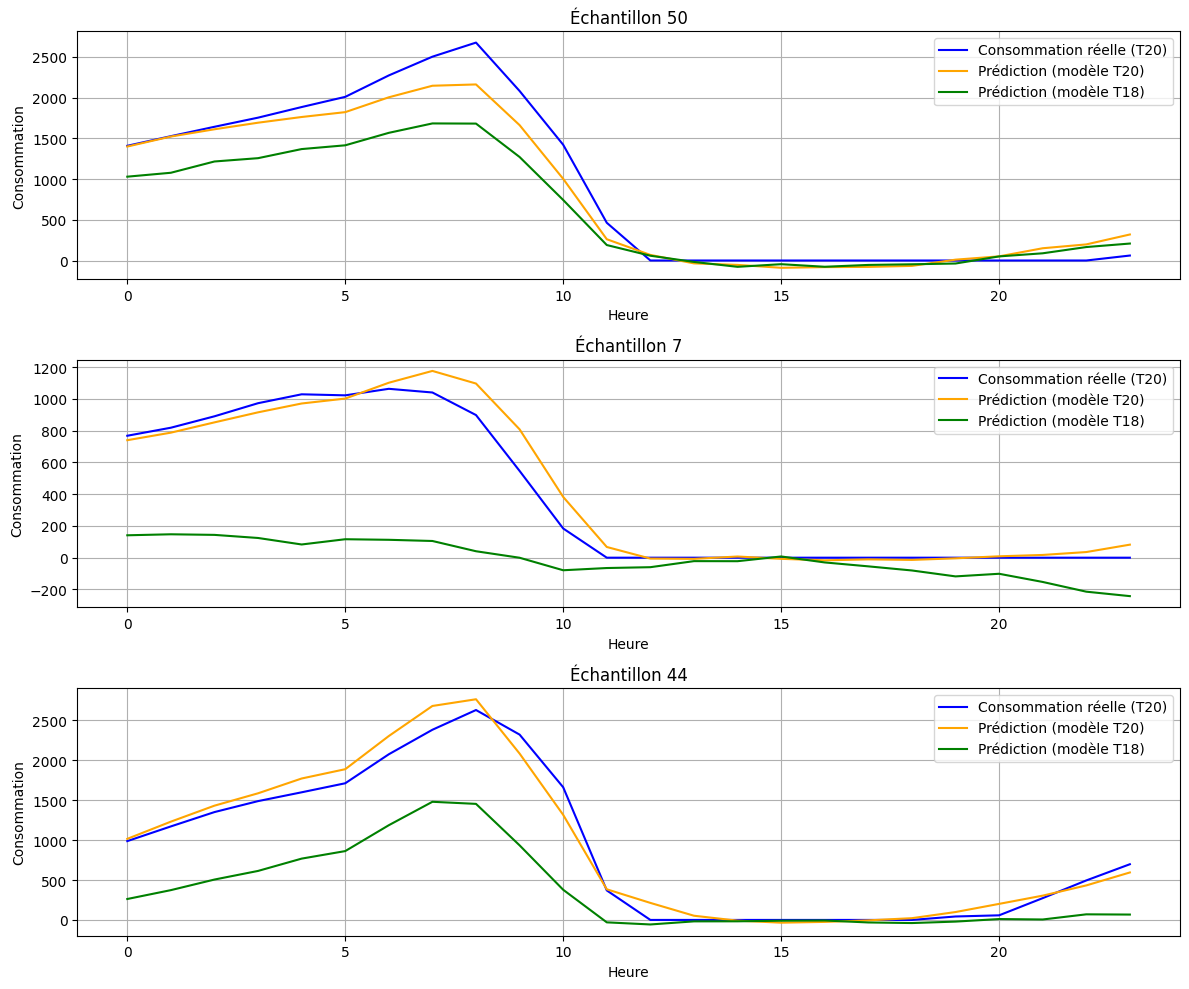

In [41]:
import matplotlib.pyplot as plt

# Liste des indices à visualiser dans X_test2_T20
sample_indices = [50, 7, 44]

plt.figure(figsize=(12, 10))

for i, sample_index in enumerate(sample_indices, 1):
    

    # Vraie consommation T20
    conso_T20 = scaler_y_T20.inverse_transform(y_test2_T20[sample_index].reshape(1, -1)).flatten()

    # Prédiction du modèle entraîné sur T20
    prediction_T20 = scaler_y_T20.inverse_transform(predictions2_T20[sample_index].reshape(1, -1)).flatten()

    # Prédiction du modèle entraîné sur T18, testée sur T20
    prediction_T18 = scaler_y_T18.inverse_transform(predictions2_T18[sample_index].reshape(1, -1)).flatten()

    plt.subplot(len(sample_indices), 1, i)
    plt.plot(conso_T20, label="Consommation réelle (T20)", color='blue')
    plt.plot(prediction_T20, label="Prédiction (modèle T20)", color='orange')
    plt.plot(prediction_T18, label="Prédiction (modèle T18)", color='green')
    plt.title(f"Échantillon {sample_index}")
    plt.xlabel("Heure")
    plt.ylabel("Consommation")
    plt.grid(True)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
